In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import sys,os
    
metroidpath = os.path.abspath('../')
if metroidpath not in sys.path:
    sys.path.append(metroidpath)
items = os.listdir(metroidpath)
if 'MES.py' not in items:
    ! jupyter nbconvert --to python ../MES.ipynb --output-dir ../
import MES as mes

[NbConvertApp] Converting notebook ../MES.ipynb to python
[NbConvertApp] Writing 51572 bytes to ../MES.py


## Mandatory Parameters:

In [3]:
from skimage import io
fpath = '../Data\\Other_Cells'


fname = 'amoeba.tif'
fullpath = fpath + '\\' + fname
video_0 = io.imread(fullpath)

fname = 'neuron.tif'
fullpath = fpath + '\\' + fname
video_2 = io.imread(fullpath)

fname = 'snap.tif'
fpath3 = '../Data\\Cell1'
fullpath3 = fpath3 + '\\' + fname
video_3 = io.imread(fullpath3)

In [4]:
n_ROIs_out = 16
n_ROIs_in = 16
nregions0 = n_ROIs_in + n_ROIs_out
mname = 'amoeba_mask.tif'
fullpath = fpath + '\\' + mname
mask0 = io.imread(fullpath)

ROIs_mask_0, label_ROIs_0 = mes.segment(mask0,n_ROIs_out=n_ROIs_out, n_ROIs_in=n_ROIs_in)

142.7737028151348


In [5]:
n_ROIs_out = 16
n_ROIs_in = 16
nregions1 = n_ROIs_in + n_ROIs_out
mname = 'amoeba_mask2.tif'
fullpath = fpath + '\\' + mname
mask1 = io.imread(fullpath)

ROIs_mask_1, label_ROIs_1 = mes.segment(mask1,n_ROIs_out=n_ROIs_out, n_ROIs_in=n_ROIs_in)

174.13314094564288


In [249]:
n_ROIs_out = 2
n_ROIs_in = 16
nregions2 = n_ROIs_in + n_ROIs_out
mname = 'amoeba_mask2.tif'
fullpath = fpath + '\\' + mname
mask1 = io.imread(fullpath)

ROIs_mask_2, label_ROIs_2 = mes.segment(mask1,n_ROIs_out=n_ROIs_out, n_ROIs_in=n_ROIs_in)

174.13314094564288


In [7]:
n_ROIs_out = 16
n_ROIs_in = 4
nregions3 = n_ROIs_in + n_ROIs_out
mname = 'amoeba_mask2.tif'
fullpath = fpath + '\\' + mname
mask1 = io.imread(fullpath)

ROIs_mask_3, label_ROIs_3 = mes.segment(mask1,n_ROIs_out=n_ROIs_out, n_ROIs_in=n_ROIs_in)

174.13314094564288


In [8]:
n_ROIs_out = 16
n_ROIs_in = 8
nregions4 = n_ROIs_in + n_ROIs_out
mname = 'neuron_mask.tif'
fullpath = fpath + '\\' + mname
mask2 = io.imread(fullpath)

ROIs_mask_4, label_ROIs_4 = mes.segment(mask2,n_ROIs_out=n_ROIs_out, n_ROIs_in=n_ROIs_in)

134.96021042078783


In [11]:
n_ROIs_out = 40
n_ROIs_in = 40
nregions5 = n_ROIs_in + n_ROIs_out
mname = 'mask1.tif'
fullpath3 = fpath3 + '\\video0\\' + mname
mask3 = io.imread(fullpath3)

ROIs_mask_5, label_ROIs_5 = mes.segment(mask3,n_ROIs_out=n_ROIs_out, n_ROIs_in=n_ROIs_in)

98.78300875602363


## Plot the results:
### 1. Video0

In [223]:
nregions = nregions0
ncolors = 9
from matplotlib import cm
from matplotlib.colors import ListedColormap
brg = cm.get_cmap('brg', nregions)
newcolors2 = np.tile((np.arange(0,ncolors))/(ncolors-1),nregions//(ncolors-1))
newcolors2 = newcolors2[:nregions]
newcolors2 = brg(newcolors2)
black = np.array([0, 0, 0, 1])
newcolors2 = np.insert(newcolors2,0,black,axis=0)
newcmp2 = ListedColormap(newcolors2)

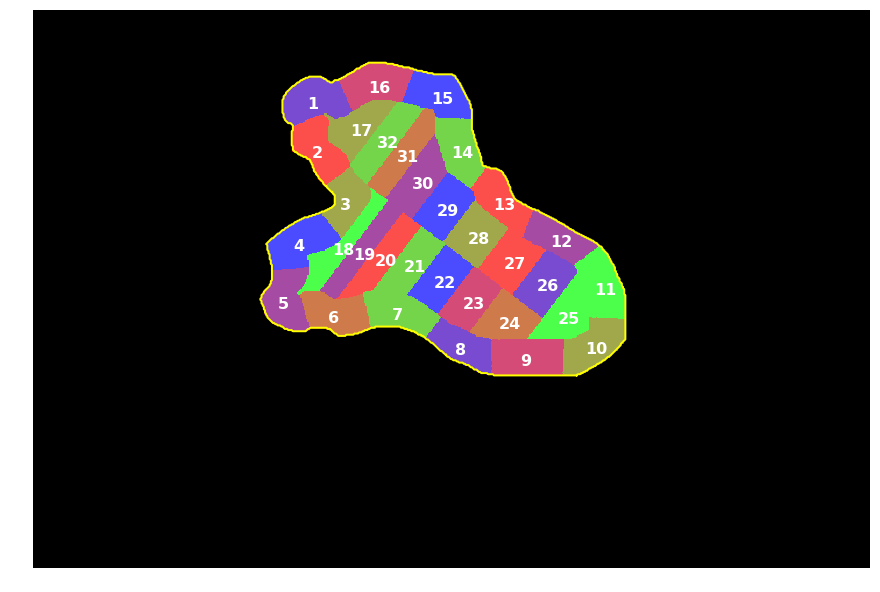

In [248]:
fig, ax = plt.subplots(figsize=[15,20],nrows=1, ncols=1)
ax.imshow(label_ROIs_0, cmap=newcmp2)

cent_coord = np.zeros((nregions,2))
fontsize=16
for j in range(nregions):
#     a = np.zeros_like(label_ROIs).astype(bool)
#     a[ROIs_means==j+1] = True
    cent_coord[j,:] = np.rint(mes.get_centroid(ROIs_mask_0[j,:,:]))
    offset = -fontsize//2
    ax.annotate(j+1,(cent_coord[j,0],cent_coord[j,1]),xycoords='data',xytext=(offset, offset),
                textcoords='offset points',color='white',fontsize=fontsize,weight='bold')
ax.axis('off')
contour = mes.build_contour(mask0)
ax.imshow(mask0,cmap='gray',alpha=0.3)
ax.plot(contour[:,1],contour[:,0],color='yellow',lw=2)

# from skimage.feature import canny
# from skimage.filters import sobel
# edges = sobel(mask3)
# edges[edges>=np.mean(edges[edges>0])]=1
# edges[edges<np.mean(edges[edges>0])] = 0
# # edges = canny(mask3*255)
# edges = np.ma.masked_where(edges == False, edges)
# ax.imshow(edges,cmap='binary')

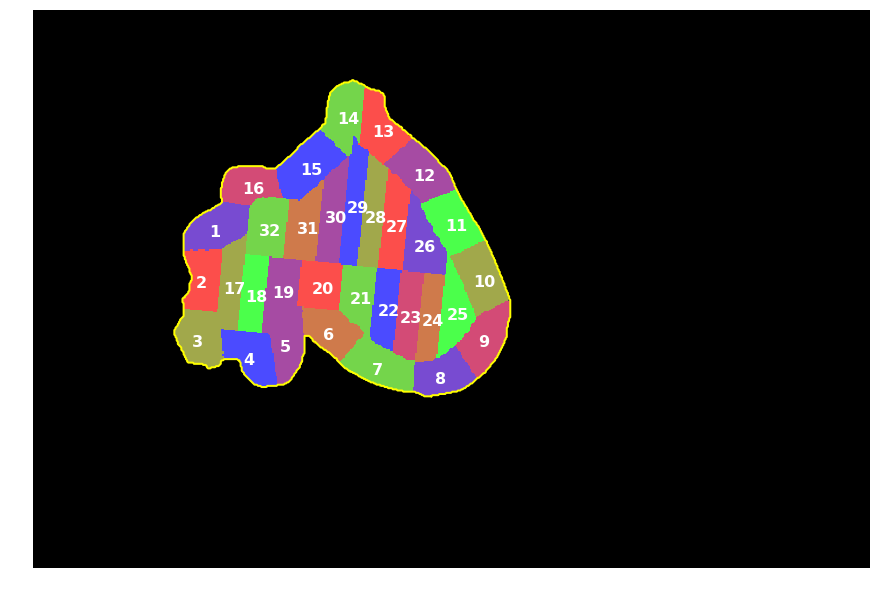

In [246]:
nregions = nregions1
fig, ax = plt.subplots(figsize=[15,20],nrows=1, ncols=1)
ax.imshow(label_ROIs_1, cmap=newcmp2)

cent_coord = np.zeros((nregions,2))
fontsize=16
for j in range(nregions):
#     a = np.zeros_like(label_ROIs).astype(bool)
#     a[ROIs_means==j+1] = True
    cent_coord[j,:] = np.rint(mes.get_centroid(ROIs_mask_1[j,:,:]))
    offset = -fontsize//2
    ax.annotate(j+1,(cent_coord[j,0],cent_coord[j,1]),xycoords='data',xytext=(offset, offset),
                textcoords='offset points',color='white',fontsize=fontsize,weight='bold')
ax.axis('off')
contour = mes.build_contour(mask1)
ax.imshow(mask1,cmap='gray',alpha=0.3)
ax.plot(contour[:,1],contour[:,0],color='yellow',lw=2)

# from skimage.feature import canny
# from skimage.filters import sobel
# edges = sobel(mask3)
# edges[edges>=np.mean(edges[edges>0])]=1
# edges[edges<np.mean(edges[edges>0])] = 0
# # edges = canny(mask3*255)
# edges = np.ma.masked_where(edges == False, edges)
# ax.imshow(edges,cmap='binary')

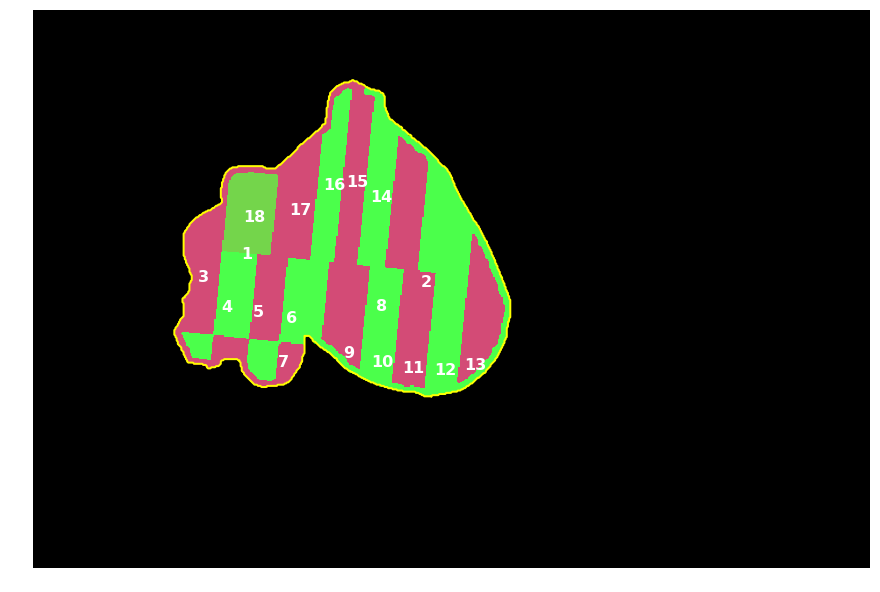

In [250]:
nregions = nregions2
fig, ax = plt.subplots(figsize=[15,20],nrows=1, ncols=1)
ax.imshow(label_ROIs_2, cmap=newcmp2)

cent_coord = np.zeros((nregions,2))
fontsize=16
for j in range(nregions):
#     a = np.zeros_like(label_ROIs).astype(bool)
#     a[ROIs_means==j+1] = True
    cent_coord[j,:] = np.rint(mes.get_centroid(ROIs_mask_2[j,:,:]))
    offset = -fontsize//2
    ax.annotate(j+1,(cent_coord[j,0],cent_coord[j,1]),xycoords='data',xytext=(offset, offset),
                textcoords='offset points',color='white',fontsize=fontsize,weight='bold')
ax.axis('off')
contour = mes.build_contour(mask1)
ax.imshow(mask1,cmap='gray',alpha=0.3)
ax.plot(contour[:,1],contour[:,0],color='yellow',lw=2)

# from skimage.feature import canny
# from skimage.filters import sobel
# edges = sobel(mask3)
# edges[edges>=np.mean(edges[edges>0])]=1
# edges[edges<np.mean(edges[edges>0])] = 0
# # edges = canny(mask3*255)
# edges = np.ma.masked_where(edges == False, edges)
# ax.imshow(edges,cmap='binary')

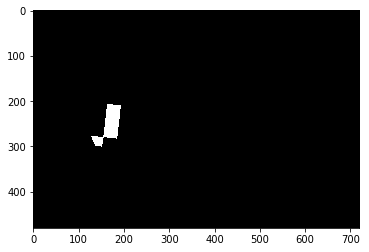

In [252]:
plt.imshow(ROIs_mask_2[3,:,:],cmap='gray')

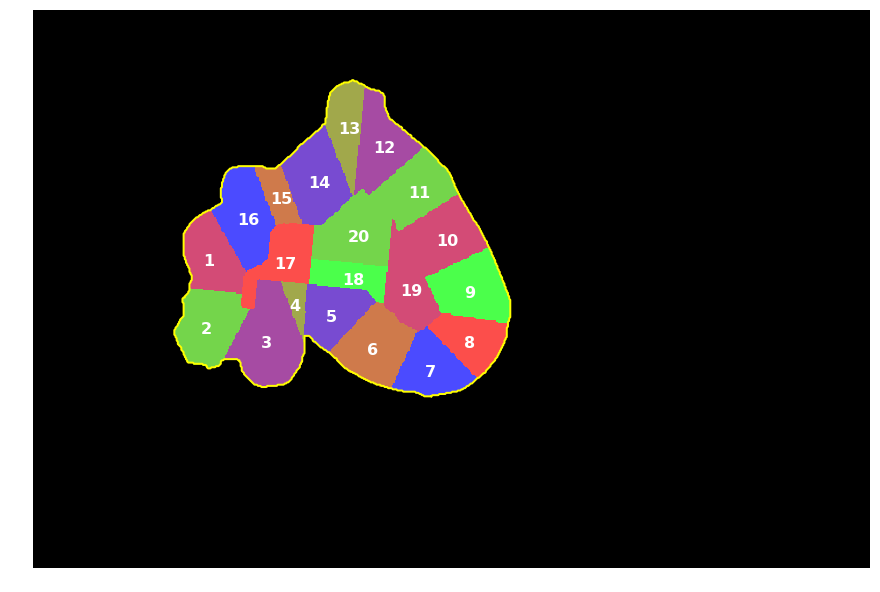

In [244]:
nregions = nregions3
fig, ax = plt.subplots(figsize=[15,20],nrows=1, ncols=1)
ax.imshow(label_ROIs_3, cmap=newcmp2)

cent_coord = np.zeros((nregions,2))
fontsize=16
for j in range(nregions):
#     a = np.zeros_like(label_ROIs).astype(bool)
#     a[ROIs_means==j+1] = True
    cent_coord[j,:] = np.rint(mes.get_centroid(ROIs_mask_3[j,:,:]))
    offset = -fontsize//2
    ax.annotate(j+1,(cent_coord[j,0],cent_coord[j,1]),xycoords='data',xytext=(offset, offset),
                textcoords='offset points',color='white',fontsize=fontsize,weight='bold')
ax.axis('off')
contour = mes.build_contour(mask1)
ax.imshow(mask1,cmap='gray',alpha=0.3)
ax.plot(contour[:,1],contour[:,0],color='yellow',lw=2)

# from skimage.feature import canny
# from skimage.filters import sobel
# edges = sobel(mask3)
# edges[edges>=np.mean(edges[edges>0])]=1
# edges[edges<np.mean(edges[edges>0])] = 0
# # edges = canny(mask3*255)
# edges = np.ma.masked_where(edges == False, edges)
# ax.imshow(edges,cmap='binary')

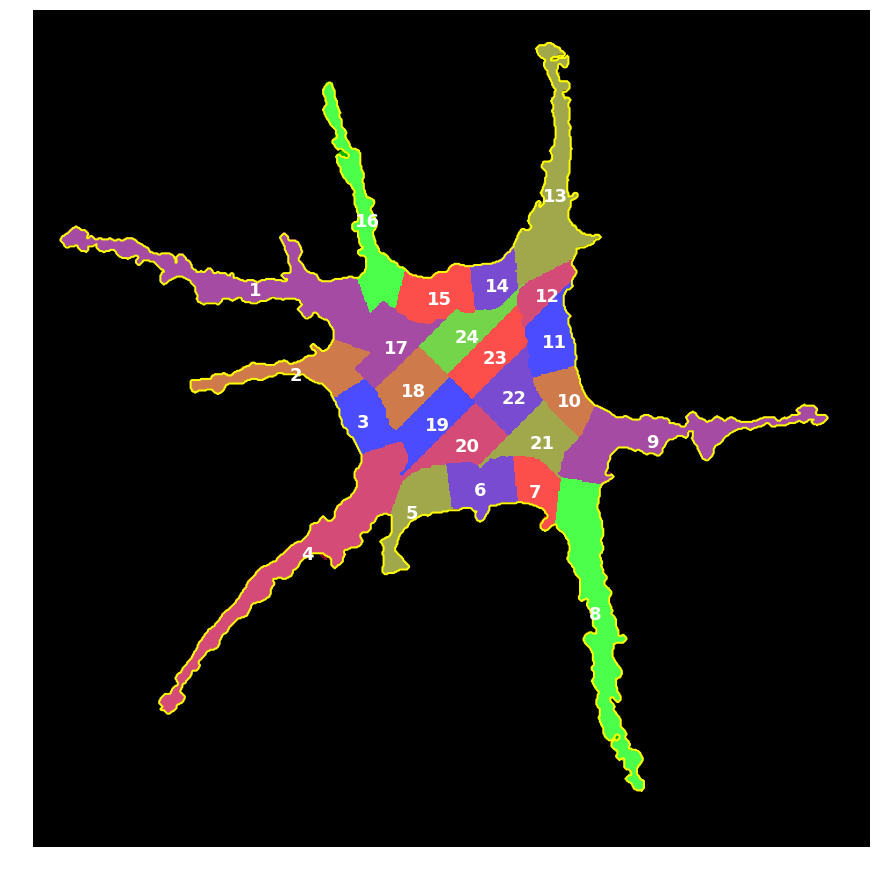

In [243]:
nregions = nregions4
fig, ax = plt.subplots(figsize=[15,20],nrows=1, ncols=1)
ax.imshow(label_ROIs_4, cmap=newcmp2)

cent_coord = np.zeros((nregions,2))
fontsize=18
for j in range(nregions):
#     a = np.zeros_like(label_ROIs).astype(bool)
#     a[ROIs_means==j+1] = True
    cent_coord[j,:] = np.rint(mes.get_centroid(ROIs_mask_4[j,:,:]))
    offset = -fontsize//2
    ax.annotate(j+1,(cent_coord[j,0],cent_coord[j,1]),xycoords='data',xytext=(offset, offset),
                textcoords='offset points',color='white',fontsize=fontsize,weight='bold')
ax.axis('off')
contour = mes.build_contour(mask2)
ax.imshow(mask2,cmap='gray',alpha=0.3)
ax.plot(contour[:,1],contour[:,0],color='yellow',lw=2)

# from skimage.feature import canny
# from skimage.filters import sobel
# edges = sobel(mask3)
# edges[edges>=np.mean(edges[edges>0])]=1
# edges[edges<np.mean(edges[edges>0])] = 0
# # edges = canny(mask3*255)
# edges = np.ma.masked_where(edges == False, edges)
# ax.imshow(edges,cmap='binary')

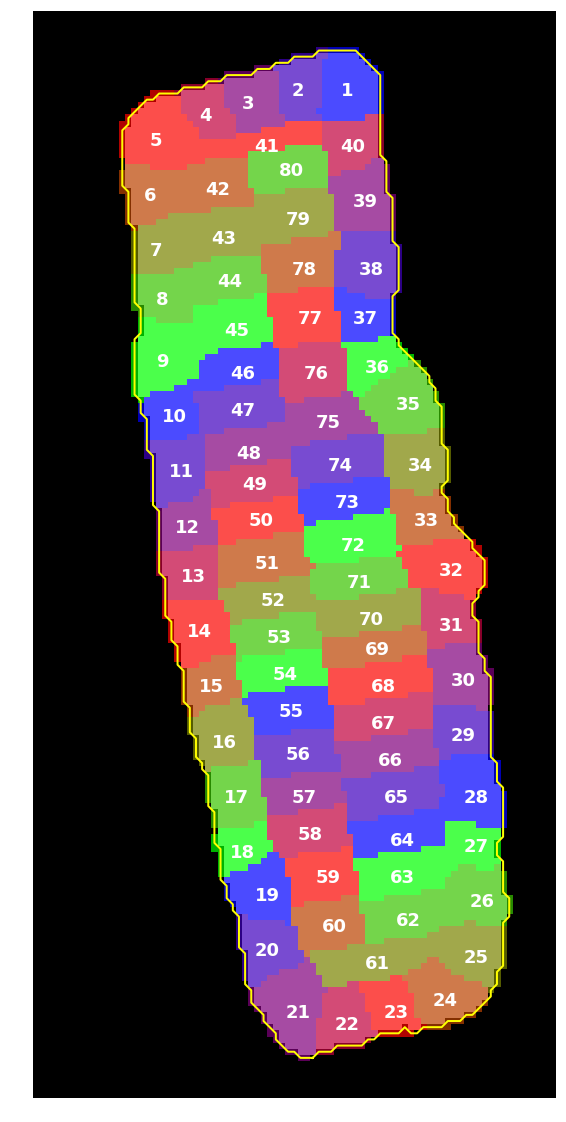

In [242]:
nregions = nregions5
ncolors = 9
from matplotlib import cm
from matplotlib.colors import ListedColormap
brg = cm.get_cmap('brg', nregions)
newcolors2 = np.tile((np.arange(0,ncolors))/(ncolors-1),nregions//(ncolors-1))
newcolors2 = newcolors2[:nregions]
newcolors2 = brg(newcolors2)
black = np.array([0, 0, 0, 1])
newcolors2 = np.insert(newcolors2,0,black,axis=0)
newcmp2 = ListedColormap(newcolors2)


fig, ax = plt.subplots(figsize=[15,20],nrows=1, ncols=1)
ax.imshow(label_ROIs_5, cmap=newcmp2)

cent_coord = np.zeros((nregions,2))
fontsize=18
for j in range(nregions):
#     a = np.zeros_like(label_ROIs).astype(bool)
#     a[ROIs_means==j+1] = True
    cent_coord[j,:] = np.rint(mes.get_centroid(ROIs_mask_5[j,:,:]))
    offset = -fontsize//2
    ax.annotate(j+1,(cent_coord[j,0],cent_coord[j,1]),xycoords='data',xytext=(offset, offset),
                textcoords='offset points',color='white',fontsize=fontsize,weight='bold')
ax.axis('off')
contour = mes.build_contour(mask3)
ax.imshow(mask3,cmap='gray',alpha=0.3)
ax.plot(contour[:,1],contour[:,0],color='yellow',lw=2)

# from skimage.feature import canny
# from skimage.filters import sobel
# edges = sobel(mask3)
# edges[edges>=np.mean(edges[edges>0])]=1
# edges[edges<np.mean(edges[edges>0])] = 0
# # edges = canny(mask3*255)
# edges = np.ma.masked_where(edges == False, edges)
# ax.imshow(edges,cmap='binary')